In [1]:
%matplotlib notebook
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits import mplot3d

# Solves 1D heat conduction equation with Crank-Nicolson algorithm

# Constants (MK, year units)
s_yr = 3.1558*10**7
alpha = 10**-6*s_yr   # thermal diffusivity of Earth (m^2/yr)
H = 30.0        # depth at which temp is fixed (m)
Nz = 300     # number of grid cells
dz = H/Nz       # grid cell size (m)
Time_tot = 10   # total time (yr)
dt = dz**2/alpha # time-step size (yr)
Nt = int(Time_tot/dt)   # number of time steps
K  = alpha*dt/(dz*dz)
print('K = ', K)
print('# grid=',Nz, '# time steps=',Nt)
print('grid size=',dz, 'time int=',dt)

# Create arrays
z = np.linspace(0,H,Nz+1) # position array, length H, Nz+1 points
t = np.linspace(0,Time_tot,Nt+1) # time array, duration Time_tot, Nt+1 points
T = np.zeros([Nz+1,Nt+1]) # temp array

# Initial conditions
T0 = 0 # initial temp in deg C
T1 = 30 # amplitude of temp variation
w1 = 2*np.pi # seasonal variation cycle time in yr^-1
T[:,0] = 0




K =  1.0
# grid= 300 # time steps= 31557
grid size= 0.1 time int= 0.0003168768616515623


In [2]:
# print(T)
# print(np.max(T))
# print(np.min(T))

In [3]:
# Integrate in time with Euler method
#for j in range(0,Nt):
#    for i in range(1,Nx): # not including 0 or Nx (the ends of the rod)
#        T[i,j+1] = T[i,j] + K*(T[i+1,j]+T[i-1,j]-2.0*T[i,j])



In [4]:
# Integrate in time with Crank-Nicolson method
M1 = np.zeros([Nz+1,Nz+1]) # matrix with coefficients for each position (left side of equation)
M1[0,0]=1 # assign 1. When multiplied by temp vector = T0 for boundary condition for time point j+1
M1[Nz,Nz]=1 # assign 1. When multiplied by temp vector = Tn for boundary condition for time point j+1
for i in range(1,Nz): # populate matrix with coefficients
    M1[i,i-1]=-0.5*K
    M1[i,i  ]=1.0+K
    M1[i,i+1]=-0.5*K
M2 = np.zeros([Nz+1,Nz+1]) # matrix with coefficients for each position (right size of equation)
M2[0,0]=1 # assign 1. When multiplied by temp vector = T0 for boundary condition for time point j
M2[Nz,Nz]=1 #assign 1. When multiplied by temp vector = Tn for boundary condition for time point j
for i in range(1,Nz): # populate matrix with coefficients
    M2[i,i-1]=0.5*K
    M2[i,i  ]=1.0-K
    M2[i,i+1]=0.5*K
MM = np.matmul(inv(M1),M2) # matrix multiply M1 and M2 to get one transformation matrix

for j in range(0,Nt): # temp vector at j+1 time point equals transform matrix times temp vector at j time point
    T[0,j]=T0+T1*np.sin(w1*t[j]) # sin function, temp at surface over time
    T[:,j+1]=np.matmul(MM,T[:,j])
    



In [5]:
# print('M1', M1)
# print('M2', M2)
# print('MM', MM)
# print(T)
# print(np.max(T))
# print(np.min(T))

In [6]:
# Let's animate the solution
fig = plt.figure()
ax = plt.axes(xlim=(0, H), ylim=(-35, 35))
ax.plot(z,T[:,0],'-r')
plt.xlabel('depth (m)')
plt.ylabel('temperature (deg Celsius)')

line, = ax.plot([], [], lw=3)
time_template = 'time = %.3f yr'
time_text = ax.text(0.7, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    line.set_data(z,T[:,i])
    time_text.set_text(time_template % t[i])
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(t)),
                              interval=1, blit=True, init_func=init)

plt.show()


<IPython.core.display.Javascript object>

In [7]:
print(t[789])

0.25002376651772984


<IPython.core.display.Javascript object>


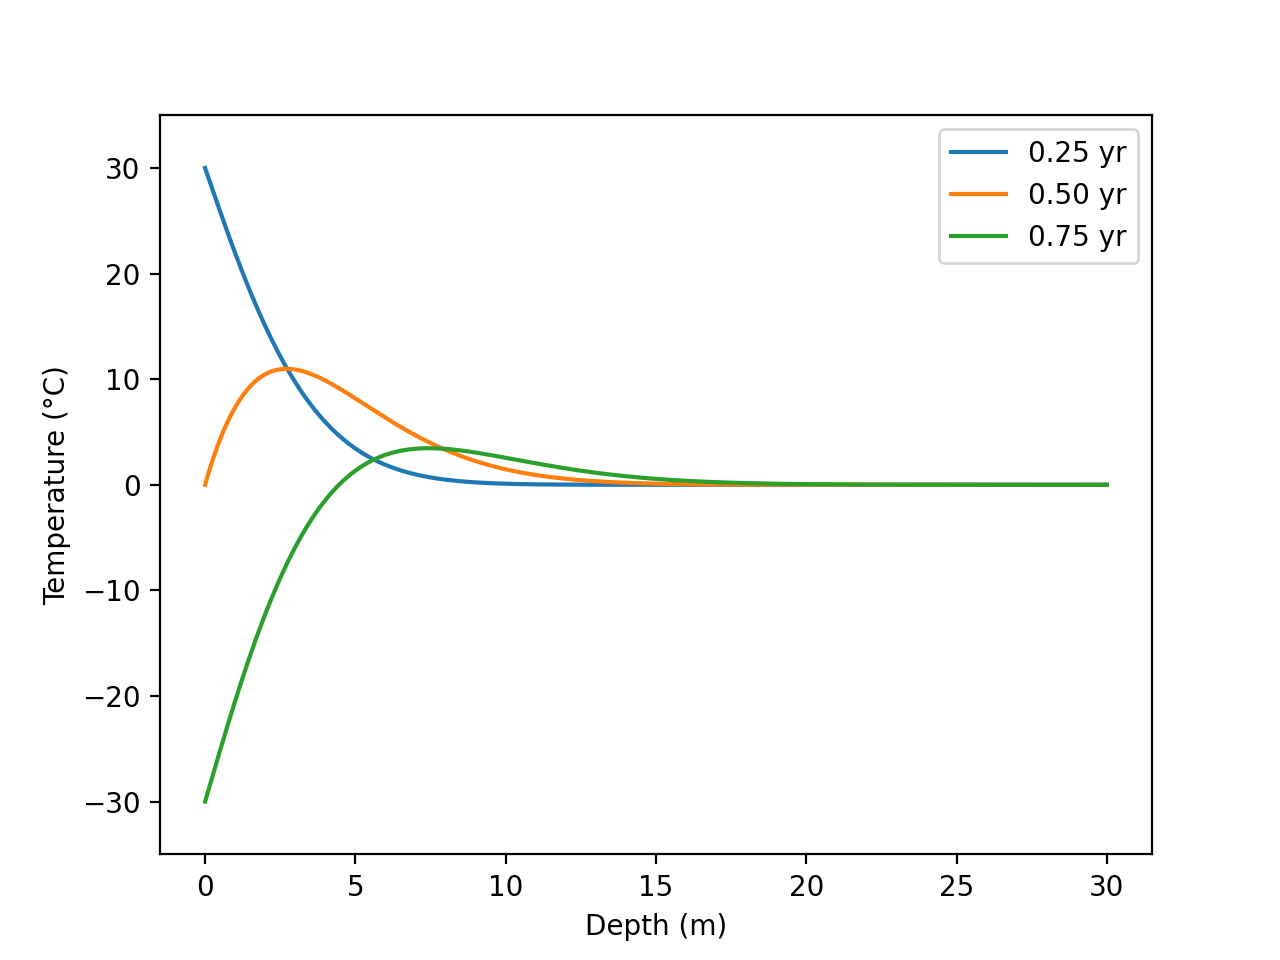

In [8]:
%matplotlib notebook
degsign = u'\N{DEGREE SIGN}'
plt.plot(z,T[:,789], label="{} yr".format("%.2f"%t[789]))
plt.plot(z,T[:,1578], label="{} yr".format("%.2f"%t[1578]))
plt.plot(z,T[:,2367], label="{} yr".format("%.2f"%t[2367]))
plt.xlabel('Depth (m)')
plt.ylabel("Temperature ({}C)".format(degsign))
plt.ylim(-35,35)
plt.legend()

In [13]:
print(np.shape(z))
print(np.shape(t))
print(np.shape(T))
z, t = np.meshgrid(z, t)
print(z,t)
print(np.shape(z))
print(np.shape(t))

(301,)
(31558,)
(301, 31558)
[[ 0.   0.1  0.2 ... 29.8 29.9 30. ]
 [ 0.   0.1  0.2 ... 29.8 29.9 30. ]
 [ 0.   0.1  0.2 ... 29.8 29.9 30. ]
 ...
 [ 0.   0.1  0.2 ... 29.8 29.9 30. ]
 [ 0.   0.1  0.2 ... 29.8 29.9 30. ]
 [ 0.   0.1  0.2 ... 29.8 29.9 30. ]] [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.16886903e-04 3.16886903e-04 3.16886903e-04 ... 3.16886903e-04
  3.16886903e-04 3.16886903e-04]
 [6.33773806e-04 6.33773806e-04 6.33773806e-04 ... 6.33773806e-04
  6.33773806e-04 6.33773806e-04]
 ...
 [9.99936623e+00 9.99936623e+00 9.99936623e+00 ... 9.99936623e+00
  9.99936623e+00 9.99936623e+00]
 [9.99968311e+00 9.99968311e+00 9.99968311e+00 ... 9.99968311e+00
  9.99968311e+00 9.99968311e+00]
 [1.00000000e+01 1.00000000e+01 1.00000000e+01 ... 1.00000000e+01
  1.00000000e+01 1.00000000e+01]]
(31558, 301)
(31558, 301)


In [14]:
ZT=np.transpose(z)
print(np.shape(ZT))

(301, 31558)


In [15]:
tT=np.transpose(t)
print(np.shape(tT))

(301, 31558)


In [16]:
print(np.shape(T))

(301, 31558)


<IPython.core.display.Javascript object>


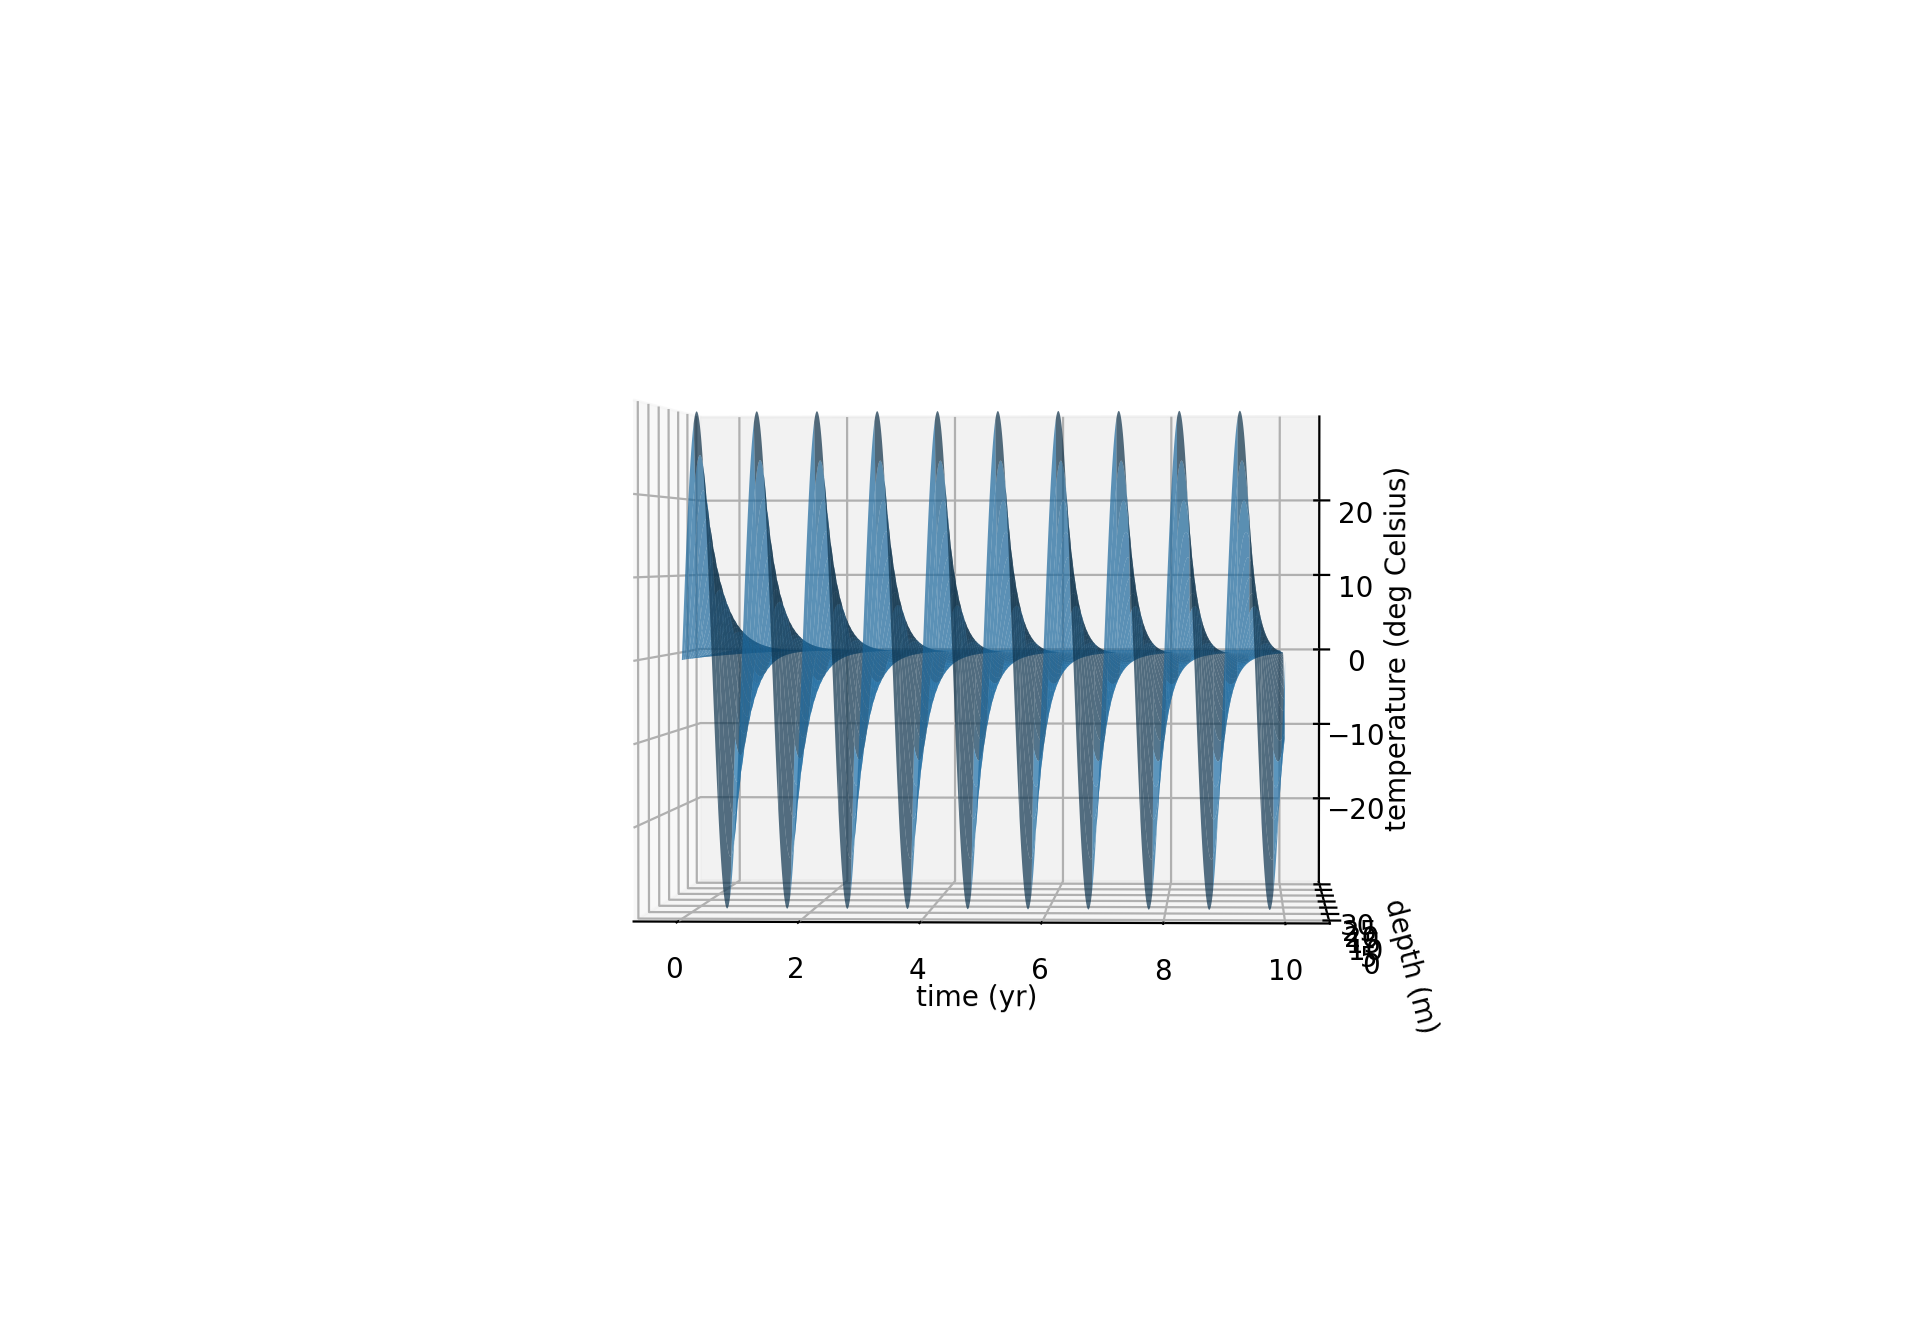

In [21]:
%matplotlib notebook

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(tT,ZT,T, alpha=0.7)
ax.set_xlabel('time (yr)')
ax.set_ylabel('depth (m)')
ax.set_zlabel('temperature (deg Celsius)');